## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Kelvin Waters
# Online FT 01/21/20 cohort
# Once submitted
# Abhineet Kulkarni

### Best practice to import all the necessary files up top ###

In [2]:
from importlib import reload

import sqlite3
import pandas as pd
import numpy as np
import helper_functions as hf

import matplotlib.pyplot as plt
%matplotlib inline

import squarify
import seaborn as sns
sns.set(style= 'ticks', color_codes= True)

### This line will preload the helper_functions.py (table_list, load_table, and convert_dollars_to_int) within this notebook directory ###

In [3]:
# can't mask this from displaying desktop dir information
reload(hf)

<module 'helper_functions' from 'C:\\Users\\kelvi\\flatiron\\section01\\dsc-mod-1-project-v2-1-online-ds-ft-120919\\helper_functions.py'>

### Preview tables with a .head(2) to preview table data, and the avaiable columns ###

In [4]:
# head(2) is preferable the default (5) is too large and you'd have to scroll between the datasets which I will have to
# perform during the EDA phase anyway

def preview_tables(conn, tables='all'):
    all_tables = hf.get_table_list(conn)
    if tables=='all':
        final_table_names = all_tables
        
    elif type(tables) == list:
        final_table_names = [t for t in all_tables if t in tables]
    
    for table_name in final_table_names:
        print(f"Showing Table: {table_name}")
        query = f"select * from {table_name};"
        df = pd.read_sql(query, conn)
        display(df.head(2))
        print("-"*100)
    print("finished")
    return None

In [5]:
# sqlite connection
conn = sqlite3.Connection("movies_db.sqlite")
c = conn.cursor()

In [6]:
# loads all tables 
table_names = hf.get_table_list(conn)
table_names

['bom_movie_gross',
 'name_basics',
 'title_akas',
 'title_basics',
 'title_crew',
 'title_principals',
 'title_ratings',
 'tmdb_movies',
 'tn_movie_budgets']

In [7]:
# again preview tables set to head(2) for a quick glance at some data and define the cols
preview_tables(conn, tables= 'all')

Showing Table: bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


----------------------------------------------------------------------------------------------------
Showing Table: name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


----------------------------------------------------------------------------------------------------
Showing Table: title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0


----------------------------------------------------------------------------------------------------
Showing Table: title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


----------------------------------------------------------------------------------------------------
Showing Table: title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"


----------------------------------------------------------------------------------------------------
Showing Table: title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None


----------------------------------------------------------------------------------------------------
Showing Table: title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


----------------------------------------------------------------------------------------------------
Showing Table: tmdb_movies


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


----------------------------------------------------------------------------------------------------
Showing Table: tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


----------------------------------------------------------------------------------------------------
finished


### <u>Scenario</u>: Microsoft is interested in the film industry and wants to know what types of movies provide the most bang for the production buck at the box office. 

### I will determine which studios are productive based on a number of factors and gather what specific types of movies are driving their subsequent success. 

### From the following table data: 

1. **bom_movie_gross:** 
     title, studio, domestic_gross, foreign_gross, year
    
2. **tn_movie_budgets:**
    id, release_date, movie, production_budget, domestic_gross, worldwide_gross
    
1. **tmdb_movies:**
     index, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count
    
1. **title_ratings:**
     tconst, averagerating, numvotes
    
1. **title_basics:**
     tconst,	primary_title, original_title, start_year, runtime_minutes, genres
     
### I will attempt to answer these Questions? ###
1. Who are the top studio's in the industry?
2. What genres are most productive at the box office?
3. What other factors are in a studio's aresenal to generate revenue?

### EDA on the various tables###

### bom_movie_gross table###

#### df.head() ###

In [8]:
# initial table data
# df rolling naming convention being adapted
bm = hf.load_table(conn, "bom_movie_gross")
bm.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### df.shape() ###

In [9]:
# ascertain the initial shape of the data before altering anything! 
bm.shape

(3387, 5)

#### df.info() ####

In [10]:
# basic table info 
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### df.isna() ####

In [11]:
# chainning methods to obtain the percentage of missing data
# foreign_gross has almost 40% missing NOT planning on using this column
# since there is a worldwide_gross series(cols) on another table
bm.isna().mean().round(4)* 100

title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64

#### df.groupby() to determine studio values ####

In [12]:
# studio count
# it's obvious some studio's are making a lot of films
# I wonder if that automatically correalates into positive numbers
bm.groupby('studio')['studio'].agg('count')

studio
3D        1
A23       2
A24      49
ADC       2
AF        6
         ..
XL        2
YFG       1
Yash     14
Zee       1
Zeit.    16
Name: studio, Length: 257, dtype: int64

#### df.dropna() ####
#### this drop would result in a significant loss of data, namely 1380 rows! ####

In [13]:
# dropping NaN's from domestic_gross and the 5 missing studio values
# bm1 = bm.dropna()
# bm1.isna().sum()

#### df.drop() ####

In [14]:
# dropping foreign gross from table > 30% NaN
# bm2 = bm1.drop(['foreign_gross'], axis='columns')

#### going to have to ignore the foreign_gross series/cols and retain the 1300+ rows of data! ####

In [15]:
# imperative to always verify the shape of the data with every preposed change
bm.shape

(3387, 5)

In [16]:
# from this table alone, I am able to determine the top production studio's based
# on the domestic_growth col. Once this table is joined with the worldwide_gross and 
# production_costs are calculated this list may change. 
bm2 = bm.groupby('studio')['domestic_gross'].agg('sum').sort_values(ascending= False)
bm2.head()

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.459683e+09
Name: domestic_gross, dtype: float64

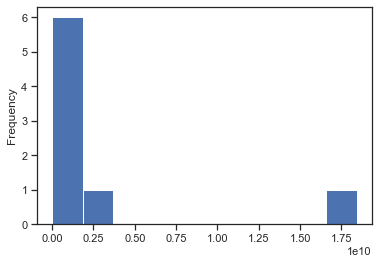

In [17]:
bm2.describe().plot.hist()

### tmdb_movies table ###

####  df.head() ####

In [18]:
# initial table data, noting the cols/series I can utilize for my analysis
# I may need to strip and or tally these genre_ids with the title 
# or find some other source for the genre_ids values
tm = hf.load_table(conn, "tmdb_movies")
tm.head()

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### df.shape() ####

In [19]:
# initial shape before messing things up
tm.shape

(26517, 10)

#### df.info() ####

In [20]:
# table info, taking note of the datatypes 
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
index                26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### df.isna() ####

In [21]:
# no missing data from this table!
tm.isna().mean().round(4)* 100

index                0.0
genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

In [22]:
tm.vote_count.describe()

count    26517.000000
mean       194.224837
std        960.961095
min          1.000000
25%          2.000000
50%          5.000000
75%         28.000000
max      22186.000000
Name: vote_count, dtype: float64

### tn_movie_budgets table ###

In [31]:
# load table
tn = hf.load_table(conn, "tn_movie_budgets")

#### This code changes these str monetary values into int64 nummerical datatype via astype in the helper_function.py within the dir of this notebook####

In [32]:
# helper functions to change these datatypes from str monetary values to int64
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tn = hf.convert_dollars_to_int(tn, col)

#### df.head() ####

In [33]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


#### df.shape() ####

In [34]:
# initial shape before muking around
tn.shape

(5782, 6)

#### df.info() ####

In [35]:
# release_date and movie are type object
# production_budget, domestic_gross, and worldwide_gross has been successfully converted to int64 numerical type
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


#### df.isna() ####

In [36]:
# this table isn't missing any data as well! 
# chainging methods
tn.isna().mean().round(4)* 100

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [38]:
# adding a new col/series with the net gross ie profit
tn['profit'] = tn['worldwide_gross'] + tn['domestic_gross'] - tn['production_budget']

#### df.head() ###

In [39]:
# df head has been altered to include a new series = profit
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


In [60]:
tn.worldwide_gross.describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

### title_basics table ###

#### df.head() ####

In [41]:
# load table
tb = hf.load_table(conn, "title_basics")
tb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### df.shape() ####

In [42]:
# initial shape of the data
tb.shape

(146144, 6)

#### df.info() ####

In [43]:
# basic table info
# taking note of the datatypes
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### df.isna() ####

In [44]:
# runtime_minutes is missing nearly 22% data
# genres are missing 4% very workable
# chaining methods for better results
tb.isna().mean().round(4)* 100

tconst              0.00
primary_title       0.00
original_title      0.01
start_year          0.00
runtime_minutes    21.72
genres              3.70
dtype: float64

#### genres col/series is a bit of a problem with multiple values, here I am splitting up the series and will concat these values later ###

In [45]:
# a single movie can be both an action, crime, and a drama!
tb1 = tb.genres.str.split(pat= ",", n=-1, expand=True)
tb1

,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
3,Comedy,Drama,None
4,Comedy,Drama,Fantasy
...,...,...,...
146139,Drama,None,None
146140,Documentary,None,None
146141,Comedy,None,None
146142,None,None,None


#### successfully concatenated the values back into the dataframe, at this point I could remove the genres series/col ####

In [48]:
# now I'll have to figure out a way to tally genres per movie title once I join the studio values 
# to this table
tb2 = pd.concat([tb, tb1], axis = 1)
tb2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,0,1,2
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Drama,None,None
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Documentary,None,None
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Comedy,None,None
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,None,None


### title_ratings table###

#### df.head() ####

In [50]:
# load the table
tr = hf.load_table(conn, "title_ratings")
tr.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### df.shape() ####

In [51]:
# initial shape
tr.shape

(73856, 3)

#### df.info() ####

In [52]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### df.isna() ####

In [53]:
# no missing data from this table
tr.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

#### let's rename averagerating series to average_rating that way it'll match the other naming conventions ####

In [54]:
# renaming col
tr.rename(columns={'averagerating': 'average_rating'}, inplace= True)

In [55]:
# taking another look at the df head
tr.head()

,tconst,average_rating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [57]:
tr.average_rating.describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: average_rating, dtype: float64

# Merging DataFrames

In [ ]:
# merge between tables title_basics, title_ratings
tb1_tr_merge = pd.merge(tb1, tr, on ='tconst')
tb1_tr_merge

In [ ]:
# merge between tables tmdb_movies, bom_movie_gross
tm1_bm2_merge = pd.merge(tm1, bm2, on = 'title')
tm1_bm2_merge

In [ ]:
merged_df = pd.merge(tm1_bm2_merge, tn2, on = 'title')
merged_df

In [ ]:
# intial shape
merged_df.shape

In [ ]:
# dropping duplicated values
merged_df = merged_df.drop_duplicates()

In [ ]:
# rechecking how much data was lost
merged_df.shape

In [ ]:
merged_df.head()

# What are the Top 5 movie studios? 

In [ ]:
# Top five studios based on net gross
Top_5 = merged_df.head().groupby('studio')['profit'].agg('sum').sort_values(ascending= False)
Top_5

In [ ]:
# top five studios
Top_5.plot.bar(color= 'red')
plt.title("Top 5 Movie Studio's")
plt.xlabel('Studio')
plt.xticks(rotation = 45)
plt.ylabel('Net in gross')
plt.style.use('ggplot')

In [ ]:
Top_5.values

In [ ]:
merged_df.pivot_table(index='studio', margins= True)

In [ ]:
# all the studios in a list obj
merged_df.studio.unique()

In [ ]:
# grouping by studio
g = merged_df.groupby('studio')
g

In [ ]:
k = merged_df.groupby('popularity')
k

In [ ]:
# looping through all the studios and separating their data
for studio, studio in g:
    print(studio)
    print(merged_df)

In [ ]:
# this is how I access each studios information
BV_df = g.get_group('BV')
WB_df = g.get_group('WB')
Sony_df = g.get_group('Sony')
Par_df = g.get_group('Par.')
Dream_Works_df = g.get_group('P/DW')

In [ ]:
Dream_Works_df

# What are the top five studio productions? 

## SONY

In [ ]:
Sony_Top = Sony_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
Sony_Top.head().plot.barh(color= 'orange')
plt.title("Sony's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

In [ ]:
Sony = Sony_Top.head(25)
type(Sony)

In [ ]:
Sy = Sony.to_frame()
Sy.keys

In [ ]:
squarify.plot(sizes=Sy.profit, label=Sy.profit, alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
# # tree map
# plt.figure(figsize=(12,8), dpi= 80)
# squarify.plot(sizes=[1279005109, 1214887258, 1039367490,  799920930,  779695098,
#         711850269,  661997672,  629580054,  596363481,  559200408,
#         557923724,  473053213,  465615580,  441818860,  412370570,
#         386837253,  367996101,  359224616,  316186216,  309565307,
#         300692333,  299260096,  296741853,  281884829,  272784601], label=['Jumanji: Welcome to the Jungle', 'Skyfall', 'Spider-Man: Homecoming',
#        'The Amazing Spider-Man', 'Spectre', 'The Amazing Spider-Man 2',
#        'The Karate Kid', 'Hotel Transylvania 3: Summer Vacation', 'The Smurfs',
#        'Hotel Transylvania 2', 'Salt', '22 Jump Street', 'Pixels',
#        'Hotel Transylvania', 'Peter Rabbit', 'The Angry Birds Movie',
#        'American Hustle', 'Grown Ups', 'Cloudy with a Chance of Meatballs 2',
#        'The Smurfs 2', 'Grown Ups 2', '21 Jump Street', 'Bad Teacher',
#        'The Social Network', 'Captain Phillips'], alpha=.7 )
# #colors = plt.cm.Dark2(np.random.rand(len(sizes))) # causing issues
# plt.title("Sony's Top Productions")
# plt.axis('off')
# plt.show()

# WB

In [ ]:
WB_Top = WB_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
WB_Top.head().plot.barh(color= 'magenta')
plt.title("WB's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

In [ ]:
WB = WB_Top.head(25)
WB.keys()

In [ ]:
# Using two lists and hard coding the values
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=[2167393572, 1321956447, 1257578198,  968100837,  947860475,
        896159941,  857791378,  839452744,  760928610,  734045036,
        611775987,  597511861,  584969504,  566980308,  544124871,
        539905648,  496974457,  449324166,  382632632,  373734374,
        322805812,  318666260,  303594589,  295545086,  292747512], label=['Wonder Woman', 'Aquaman', 'The Dark Knight Rises', 'Inception',
       'Batman v Superman: Dawn of Justice', 'Suicide Squad', 'Gravity',
       'American Sniper', 'The Hangover Part II', 'Man of Steel',
       'Fantastic Beasts: The Crimes of Grindelwald',
       'Sherlock Holmes: A Game of Shadows', 'Justice League',
       'Ready Player One', 'Kong: Skull Island', 'Dunkirk', 'The Meg',
       'The Mule', 'Crazy Rich Asians', 'Mad Max: Fury Road', 'Pacific Rim',
       'Argo', 'Sully', 'The Legend of Tarzan', 'Edge of Tomorrow'], alpha=.7 )
plt.title("Warner Bros Top Production's")
plt.axis('off')
plt.show()

# BV

In [ ]:
BV_Top = BV_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
BV_Top.head().plot.barh(color = 'green')
plt.title("Buena Vista's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

In [ ]:
BV = BV_Top.head(25)
BV.keys()

In [ ]:
# tree map
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=[3696635580, 3046415838, 2426949682, 2071395406, 1651102455,
       1531419831, 1472548818, 1424384544, 1381280180, 1307510754,
       1298153762, 1283884402, 1213777428, 1210697864,  982038313,
        934039628,  876127750,  832734116,  819944063,  812076658,
        804148847,  744046486,  730800013,  709793400,  709655656], label=['Black Panther', 'Frozen', 'Avengers: Infinity War', 'Inside Out',
       'Incredibles 2', 'Avengers: Age of Ultron', 'Moana', 'Iron Man 3',
       'Rogue One: A Star Wars Story', 'Finding Dory',
       'Captain America: Civil War', 'Toy Story 3', 'Brave', 'Zootopia',
       'Thor: Ragnarok', 'Guardians of the Galaxy',
       'Pirates of the Caribbean: On Stranger Tides', 'Coco', 'Maleficent',
       'Monsters University', 'Captain America: The Winter Soldier',
       'Doctor Strange', 'Pirates of the Caribbean: Dead Men Tell No Tales',
       'Ant-Man and the Wasp', 'Big Hero 6'], alpha=.7 )
plt.title("Buena Vista Top Production's")
plt.axis('off')
plt.show()

# Par

In [ ]:
Par_Top = Par_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
Par_Top.head().plot.barh(color= 'cyan')
plt.title("Paramount's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

In [ ]:
Pa = Par_Top.head(25)
Pa.keys()

In [ ]:
# tree map
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=[1139478152,  972093327,  763589720,  689397269,  543874361,
        516062023,  506160245,  505546655,  490391178,  480357242,
        407224281,  406771108,  400007213,  388519933,  358263765,
        347474716,  334976924,  321585782,  309650573,  306068651,
        301486068,  259264939,  256674033,  249538461,  247906038], label=['Transformers: Age of Extinction', 'Noah', 'Iron Man 2', 'Interstellar',
       'World War Z', 'Transformers: The Last Knight',
       'Star Trek Into Darkness', 'A Quiet Place', 'Bumblebee', 'Thor',
       'Captain America: The First Avenger', 'The Wolf of Wall Street',
       'The SpongeBob Movie: Sponge Out of Water', 'True Grit',
       'G.I. Joe: Retaliation', 'Shutter Island', 'Super 8',
       'The Adventures of Tintin', 'Star Trek Beyond', 'Paranormal Activity 3',
       'The Last Airbender', 'Paranormal Activity 2', 'Arrival',
       'Anchorman 2: The Legend Continues', 'Jackass Presents: Bad Grandpa'], alpha=.7 )
plt.title("Paramount Top Production's")
plt.axis('off')
plt.show()

# Dream Works

In [ ]:
Dream_Works_Top = Dream_Works_df.groupby('title')['profit'].agg('sum').sort_values(ascending= False)
Dream_Works_Top.head().plot.barh(color= 'purple')
plt.title("Dream Work's Top 5 Production's")
plt.style.use('ggplot')
plt.xlabel('Net gross')
plt.ylabel('Movie Title')

In [ ]:
DW = Dream_Works_Top.head(25)
DW.keys()

In [ ]:
# tree map
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=[1281181086,  829981460,  818312753,  680086610,  574247981,
        547452224,  340303061,  265313660,   90822839,    -759387], label=['Transformers: Dark of the Moon', 'Shrek Forever After',
       "Madagascar 3: Europe's Most Wanted", 'Kung Fu Panda 2',
       'Puss in Boots', 'How to Train Your Dragon', 'Megamind',
       'Rise of the Guardians', 'Dinner for Schmucks', 'A Thousand Words'], alpha=.7 )
plt.title("Dream Works Top Production's")
plt.axis('off')
plt.show()

# How voting average and popularity play a roll in a studios success? 

In [ ]:
"""the vote counts and popularity are very much similiar seeing as how these are 
the top budgeted movies in production where the vast amount of monies being generated
are solely from franchise films which have an unsurmountable following. """

In [ ]:
merged_df.head()

In [ ]:
pop = merged_df.head().groupby('studio')['popularity'].agg('sum').sort_values(ascending= True)
pop.plot()
plt.title("Popularity")
plt.style.use('ggplot')
plt.xlabel('Studio')

In [ ]:
pop.values

In [ ]:
vote_avg = merged_df.head().groupby('studio')['vote_average'].agg('sum').sort_values(ascending= True)
vote_avg.plot()
plt.title("Vote Count")
plt.style.use('ggplot')
plt.xlabel('Studio')

In [ ]:
# top 5 studio bar graph net
# top 5 studio popularity 
# top 5 vote avg 
labels = ['BV', 'WB', 'Par', 'Uni', 'Drm']
vote = [6.8, 7.2, 7.7, 7.7, 8.3]
pop = [23.673, 24.445, 27.92 , 28.515, 28.734]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, pop, width, label = 'Popularity')
ax.bar(x + width/2, vote, width, label = 'Vote')
#ax.bar(x - width/2, pop, width, label ='Popularity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title("Top 5 Production Studio's")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Recommendations

### Based on my dataset I came up with a recommendation that one would have to either outright buy a studio or find an original script that can be nurtured into a franchise and do as Hollywood does, rinse and repeat, at least for all the successful box office films. 

### All of the top studio's are married to their franchises and a large percentage of their box office receipts shows this intheir bottom line. Many of these studios are defined by their subsequent franchises. 